In [47]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

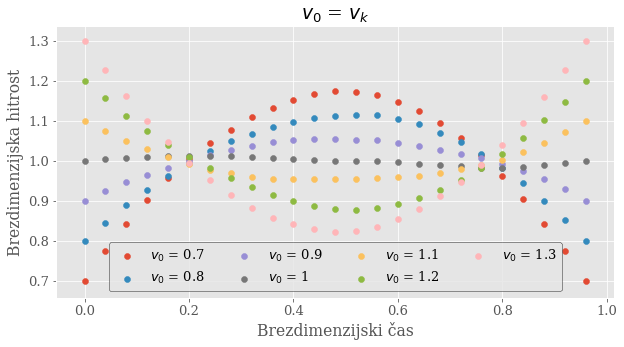

integral poti:  0.9719999999999999


In [69]:
def F(arej):
    """Primarna funkcija, ki bo minimizirana"""
    N = arej.shape[0]
    return np.sum((np.diff(arej))**2)/N



N=25

def zminaj1(v0):
    x0 = np.random.uniform(size=N)
    
    cons = ({"type": "eq", "fun" : lambda arej: 1-np.sum(arej)/arej.shape[0]},
           {"type": "eq", "fun": lambda arej: arej[0]-v0},
           {"type": "eq", "fun": lambda arej: arej[0]-arej[-1]}
           )

    res = minimize(F, x0 = x0, method="SLSQP", constraints=cons)
    return res.x

x = [i/N for i in range(N)]
plt.figure(figsize=(10, 5))
for v0 in [0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3]:
    plt.scatter(np.arange(0, 1, step=1/zminaj1(v0).shape[0]),zminaj1(v0), label=r"$v_0$ = {}".format(v0))
plt.ylabel("Brezdimenzijska hitrost")
plt.xlabel("Brezdimenzijski čas")
plt.legend(ncol=4, frameon=True, edgecolor="k")
plt.title(r"$v_0$ = $v_k$")
plt.savefig("enakostroba.pdf")
plt.savefig("enakostroba.jpg")
plt.show()
print("integral poti: ", pogoj(res.x))

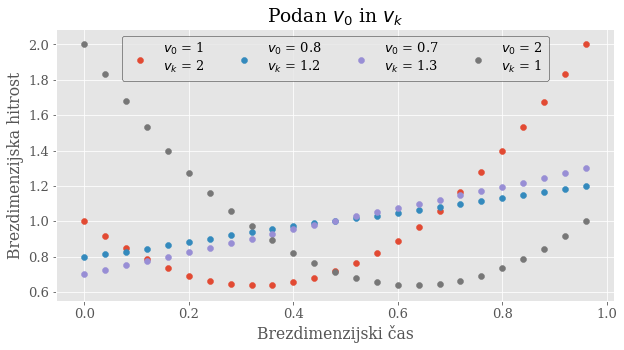

In [75]:
def F(arej):
    """Primarna funkcija, ki bo minimizirana"""
    N = arej.shape[0]
    return np.sum((np.diff(arej))**2)/N



N=25

def zminaj2(v0, vk):
    x0 = np.random.uniform(size=N)
    
    cons = ({"type": "eq", "fun" : lambda arej: 1-np.sum(arej)/arej.shape[0]},
           {"type": "eq", "fun": lambda arej: arej[0]-v0},
           {"type": "eq", "fun": lambda arej: arej[-1]-vk}
           )

    res = minimize(F, x0 = x0, method="SLSQP", constraints=cons)
    return res.x

x = [i/N for i in range(N)]
plt.figure(figsize=(10, 5))
for v0, vk in [(1,2), (0.8,1.2), (0.7, 1.3), (2, 1) ]:
    plt.scatter(np.arange(0, 1, step=1/zminaj2(v0, vk).shape[0]),zminaj1(v0, vk),
                label="$v_0$ = {}\n$v_k$ = {}".format(v0, vk))
plt.ylabel("Brezdimenzijska hitrost")
plt.xlabel("Brezdimenzijski čas")
plt.legend(ncol=4, frameon=True, edgecolor="k")
plt.title(r"Podan $v_0$ in $v_k$")
plt.savefig("vkinvo.pdf")
plt.savefig("vkinvo.jpg")
plt.show()

<Figure size 720x360 with 0 Axes>

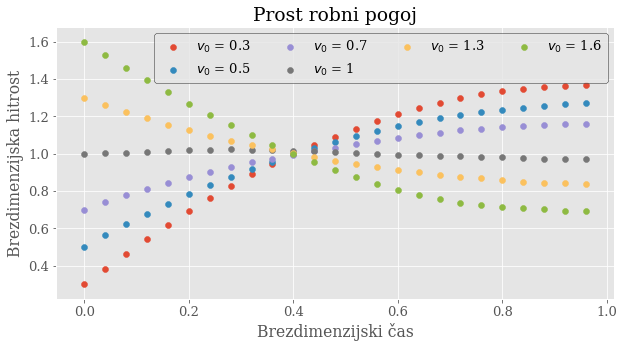

In [78]:
def F(arej):
    """Primarna funkcija, ki bo minimizirana"""
    N = arej.shape[0]
    return np.sum((np.diff(arej))**2)/N



N=25

def zminaj3(v0):
    x0 = np.random.uniform(size=N)
    
    cons = ({"type": "eq", "fun" : lambda arej: 1-np.sum(arej)/arej.shape[0]},
           {"type": "eq", "fun": lambda arej: arej[0]-v0}
           #{"type": "eq", "fun": lambda arej: arej[-1]-vk}
           )

    res = minimize(F, x0 = x0, method="SLSQP", constraints=cons)
    return res.x

x = [i/N for i in range(N)]
plt.figure(figsize=(10, 5))


x = [i/N for i in range(N)]
plt.figure(figsize=(10, 5))
for v0 in [0.3, 0.5, 0.7, 1, 1.3, 1.6]:
    plt.scatter(np.arange(0, 1, step=1/zminaj3(v0).shape[0]),zminaj3(v0), label=r"$v_0$ = {}".format(v0))
plt.ylabel("Brezdimenzijska hitrost")
plt.xlabel("Brezdimenzijski čas")
plt.legend(ncol=4, frameon=True, edgecolor="k")
plt.title(r"Prost robni pogoj")
plt.savefig("enrobni.pdf")
plt.savefig("enrobni.jpg")
plt.show()


<Figure size 720x360 with 0 Axes>

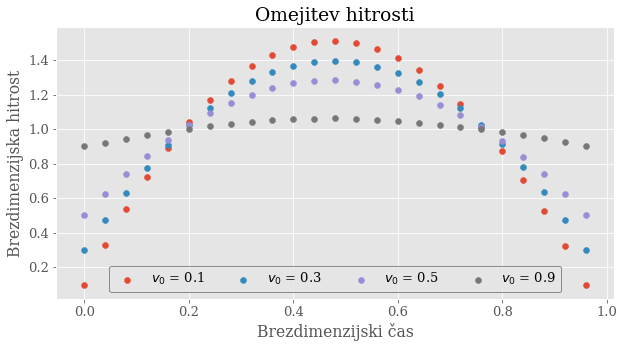

In [89]:
def F(arej):
    """Primarna funkcija, ki bo minimizirana"""
    N = arej.shape[0]
    return np.sum((np.diff(arej))**2)/N+ F100(arej)
def F100(arej):
    """Pomožna funkcija, ki nam omeji energijo na 1.3 s gainom 100000"""
    N=arej.shape[0]
    return np.exp(100000000*(np.sum(arej-1.1))) 


N=25

def zminaj4(v0):
    x0 = np.random.uniform(size=N)
    vk=v0
    cons = ({"type": "eq", "fun" : lambda arej: 1-np.sum(arej)/arej.shape[0]},
           {"type": "eq", "fun": lambda arej: arej[0]-v0},
            {"type": "eq", "fun": lambda arej: arej[-1]-vk}
           )

    res = minimize(F, x0 = x0, method="SLSQP", constraints=cons)
    return res.x

x = [i/N for i in range(N)]
plt.figure(figsize=(10, 5))


x = [i/N for i in range(N)]
plt.figure(figsize=(10, 5))
for v0 in [0.1,0.3, 0.5, 0.9]:
    plt.scatter(np.arange(0, 1, step=1/zminaj4(v0).shape[0]),zminaj4(v0), label=r"$v_0$ = {}".format(v0))
plt.ylabel("Brezdimenzijska hitrost")
plt.xlabel("Brezdimenzijski čas")
plt.legend(ncol=4, frameon=True, edgecolor="k")
plt.title(r"Omejitev hitrosti")
plt.savefig("omejenahitrost.pdf")
plt.savefig("omejenahitrost.jpg")
plt.show()

V0: 1.15, dolžina 24.999999999999996
V0: 1.15, dolžina 25.0
V0: 1, dolžina 25.0
V0: 1, dolžina 25.0
V0: 0.9, dolžina 25.0
V0: 0.9, dolžina 25.0


<Figure size 720x360 with 0 Axes>

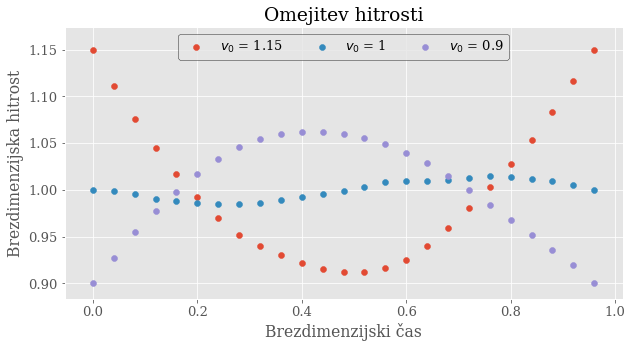

In [101]:
def F(arej):
    """Primarna funkcija, ki bo minimizirana"""
    N = arej.shape[0]
    return np.sum((np.diff(arej))**2)/N # + 10000*F100(arej)
def F100(arej):
    """Pomožna funkcija, ki nam omeji energijo na 1.3 s gainom 100000"""
    N=arej.shape[0]
    return np.exp(1000*(np.sum(arej[arej>1.2]))) 


N=25

def zminaj4(v0):
    x0 = np.random.uniform(size=N)
    vk=v0
    cons = ({"type": "eq", "fun" : lambda arej: 1-np.sum(arej)/arej.shape[0]},
           {"type": "eq", "fun": lambda arej: arej[0]-v0},
            {"type": "eq", "fun": lambda arej: arej[-1]-vk},
            {"type": "ineq", "fun": lambda arej: np.sum(arej[arej>1.3])**30}
           )

    res = minimize(F, x0 = x0, method="SLSQP", constraints=cons)
    print("V0: {}, dolžina {}".format(v0, np.sum(res.x)))
    return res.x

x = [i/N for i in range(N)]
plt.figure(figsize=(10, 5))


x = [i/N for i in range(N)]
plt.figure(figsize=(10, 5))
for v0 in [1.15, 1, 0.9]:
    plt.scatter(np.arange(0, 1, step=1/zminaj4(v0).shape[0]),zminaj4(v0), label=r"$v_0$ = {}".format(v0))
plt.ylabel("Brezdimenzijska hitrost")
plt.xlabel("Brezdimenzijski čas")
plt.legend(ncol=4, frameon=True, edgecolor="k")
plt.title(r"Omejitev hitrosti")
#plt.savefig("omejenahitrost2.pdf")
#plt.savefig("omejenahitrost2.jpg")
plt.show()

In [ ]:
x0=1
con = ({'type': 'ineq', 'fun': lambda x: 2-x})
